Data from the WFS service of the ICNF (2024) and Open Street Maps (OSM, 2024). Location of the GXTBR at the borders of Portugal and Spain.
From OSM database two groups of roads were separated
group_1 (or minor roads) = ['unclassified', 'living_street', 'pedestrian', 'path', 'steps', 'cycleway']
group_2 (or major roads) = ['trunk', 'trunk_link', 'residential', 'tertiary', 'tertiary_link', 'secondary', 'primary', 'primary_link', 'secondary_link']


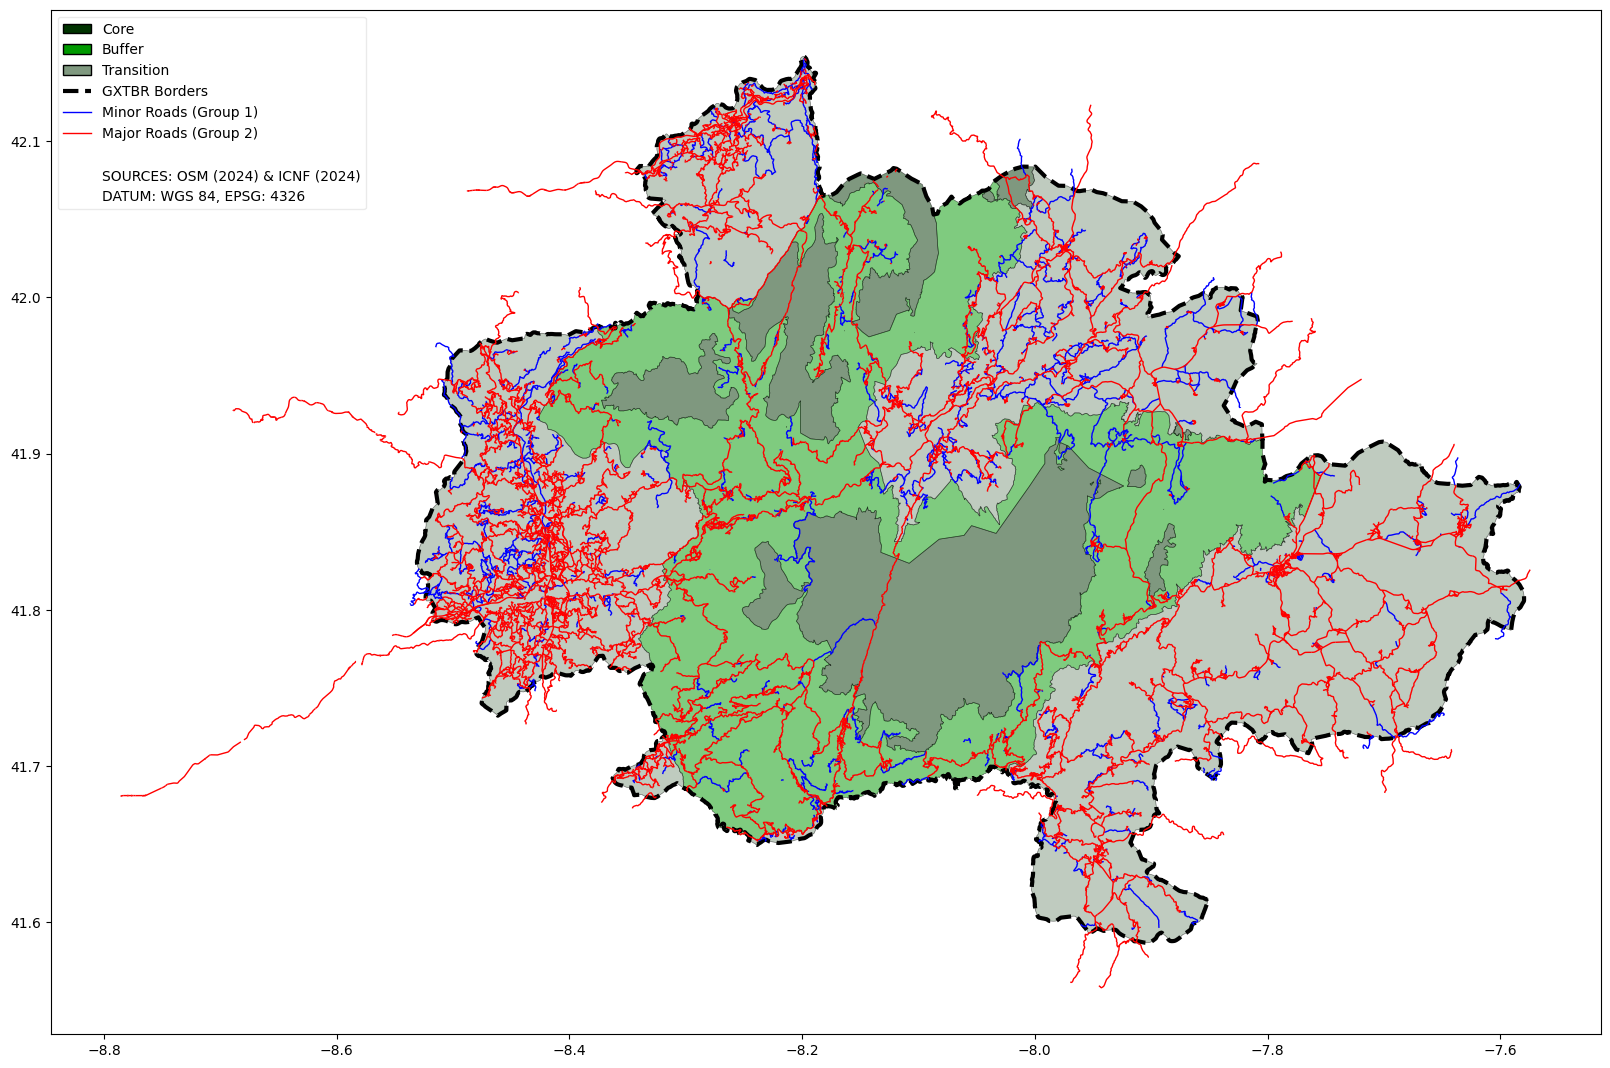

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from owslib.wfs import WebFeatureService

# Initialize WFS service
wfs_url = 'https://si.icnf.pt/wfs/zonamento_biosfera?service=wfs&version=2.0.0&request=GetCapabilities'
wfs = WebFeatureService(wfs_url)

# Fetch and filter data for specified feature type
response = wfs.getfeature(typename=['BDG:zonamento_biosfera'], outputFormat='application/json')
gdf = gpd.read_file(response)
gdf_filtered = gdf[gdf['nome'] == 'Geres']

# Reproject to EPSG:4326
gdf_filtered = gdf_filtered.to_crs(epsg=4326)

# Read existing layers and reproject them to EPSG:4326
road_network = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/Portugal Road Network/gx_osm/osmroads.shp').to_crs(epsg=4326)
new_layer = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/gx/gx/gx.shp').to_crs(epsg=4326)

# Define road categories and styles
category_styles = {
    'group_1': {'color': 'blue', 'linewidth': 1.0},
    'group_2': {'color': 'red', 'linewidth': 1.0}
}
group_1 = ['unclassified', 'living_street', 'pedestrian', 'path', 'steps', 'cycleway']
group_2 = ['trunk', 'trunk_link', 'residential', 'tertiary', 'tertiary_link', 'secondary', 'primary', 'primary_link', 'secondary_link']

# Create a new figure with the specified size
fig, ax = plt.subplots(figsize=(20, 20))

# Plot WFS layer with different shades of green for each 'zone'
for zone, color in zip(['Core', 'Buffer', 'Transition'], [(0.0, 0.200, 0.0), (0.0, 0.600, 0.0), (0.500, 0.600, 0.500)]):
    gdf_filtered[gdf_filtered['zone'] == zone].plot(ax=ax, color=color, linewidth=0.5, edgecolor='black', alpha=0.5)

# Plot other elements (GXTBR boundaries and road groups)
new_layer.boundary.plot(ax=ax, color='black', linewidth=3.0, linestyle='--')
for group, style in category_styles.items():
    roads_in_group = road_network[road_network['highway'].isin(group_1) if group == 'group_1' else road_network['highway'].isin(group_2)]
    roads_in_group.plot(ax=ax, color=style['color'], linewidth=style['linewidth'])

# Create custom legend entries
legend_elements = [
    Patch(facecolor=(0.0, 0.200, 0.0), edgecolor='black', label='Core'),  # Elegant Dark Green
    Patch(facecolor=(0.0, 0.600, 0.0), edgecolor='black', label='Buffer'),  # Elegant Medium Green
    Patch(facecolor=(0.500, 0.600, 0.500), edgecolor='black', label='Transition'),  # Elegant Light Green
    Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='GXTBR Borders'),
    Line2D([0], [0], color='blue', linewidth=1, label='Minor Roads (Group 1)'),
    Line2D([0], [0], color='red', linewidth=1, label='Major Roads (Group 2)'),
    Line2D([0], [0], color='white', linewidth=0, label=''),  # Separator
    Line2D([0], [0], color='white', linewidth=0, label='SOURCES: OSM (2024) & ICNF (2024)'),  # Custom text
    Line2D([0], [0], color='white', linewidth=0, label='DATUM: WGS 84, EPSG: 4326')  # Custom text
]

# Add legend with full transparency
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.4)

# Show the map
plt.show()


Other Protected Natural Areas around and within the GXTBR.  
Sources: OSM (2024), and ICNF (2024)

From OSM database two groups of roads were separated
group_1 (or inor roads) = ['unclassified', 'living_street', 'pedestrian', 'path', 'steps', 'cycleway']
group_2 (or major roads) = ['trunk', 'trunk_link', 'residential', 'tertiary', 'tertiary_link', 'secondary', 'primary', 'primary_link', 'secondary_link']


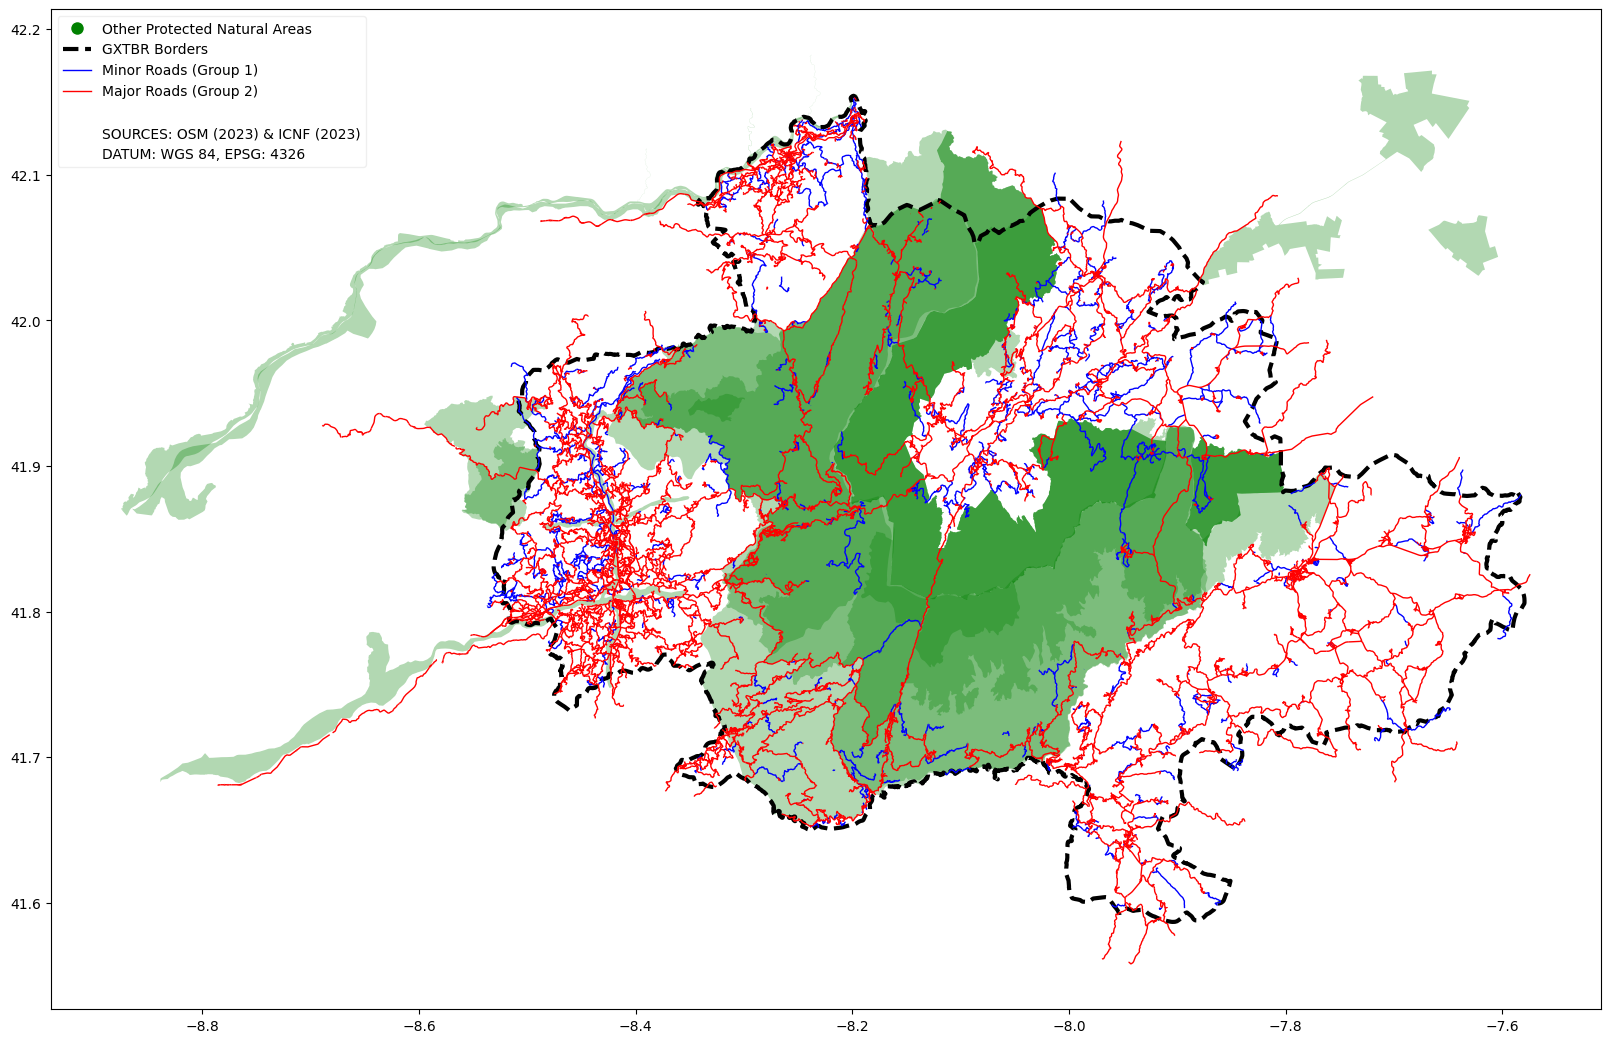

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read existing layers and reproject them to EPSG:4326
road_network = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/Portugal Road Network/gx_osm/osmroads.shp').to_crs(epsg=4326)
anps_layer = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/gx/anps (osm)/anps_osm.gpkg').to_crs(epsg=4326)
new_layer = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/gx/gx/gx.shp').to_crs(epsg=4326)

# Define road categories and styles
category_styles = {
    'group_1': {'color': 'blue', 'linewidth': 1.0},
    'group_2': {'color': 'red', 'linewidth': 1.0}
}
group_1 = ['unclassified', 'living_street', 'pedestrian', 'path', 'steps', 'cycleway']
group_2 = ['trunk', 'trunk_link', 'residential', 'tertiary','tertiary_link', 'secondary', 'primary', 'primary_link', 'secondary_link',]


# Create a new figure with the specified size
fig, ax = plt.subplots(figsize=(20, 20))

# Plot GXTBR boundaries and road groups
new_layer.boundary.plot(ax=ax, color='black', linewidth=3.0, linestyle='--')  # GXTBR borders
for group, style in category_styles.items():
    roads_in_group = road_network[road_network['highway'].isin(group_1) if group == 'group_1' else road_network['highway'].isin(group_2)]
    roads_in_group.plot(ax=ax, color=style['color'], linewidth=style['linewidth'])



# Plot the ANP layer
anps_layer.plot(ax=ax, color='green', alpha=0.3)


# Create custom legend entries
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Other Protected Natural Areas'),
    Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='GXTBR Borders'),
    Line2D([0], [0], color='blue', linewidth=1, label='Minor Roads (Group 1)'),
    Line2D([0], [0], color='red', linewidth=1, label='Major Roads (Group 2)'),
    Line2D([0], [0], color='white', linewidth=0, label=''),  # Separator
    Line2D([0], [0], color='white', linewidth=0, label='SOURCES: OSM (2023) & ICNF (2024)'),  # Custom text
    Line2D([0], [0], color='white', linewidth=0, label='DATUM: WGS 84, EPSG: 4326')  # Custom text
]

# Add legend with full transparency
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.3)

# Show the map
plt.show()


Other Protected Natural Areas around and within the GXTBR.  
Sources: OSM (2024), and ICNF (2024)

From OSM database two groups of roads were separated
group_1 (or inor roads) = ['unclassified', 'living_street', 'pedestrian', 'path', 'steps', 'cycleway']
group_2 (or major roads) = ['trunk', 'trunk_link', 'residential', 'tertiary', 'tertiary_link', 'secondary', 'primary', 'primary_link', 'secondary_link']


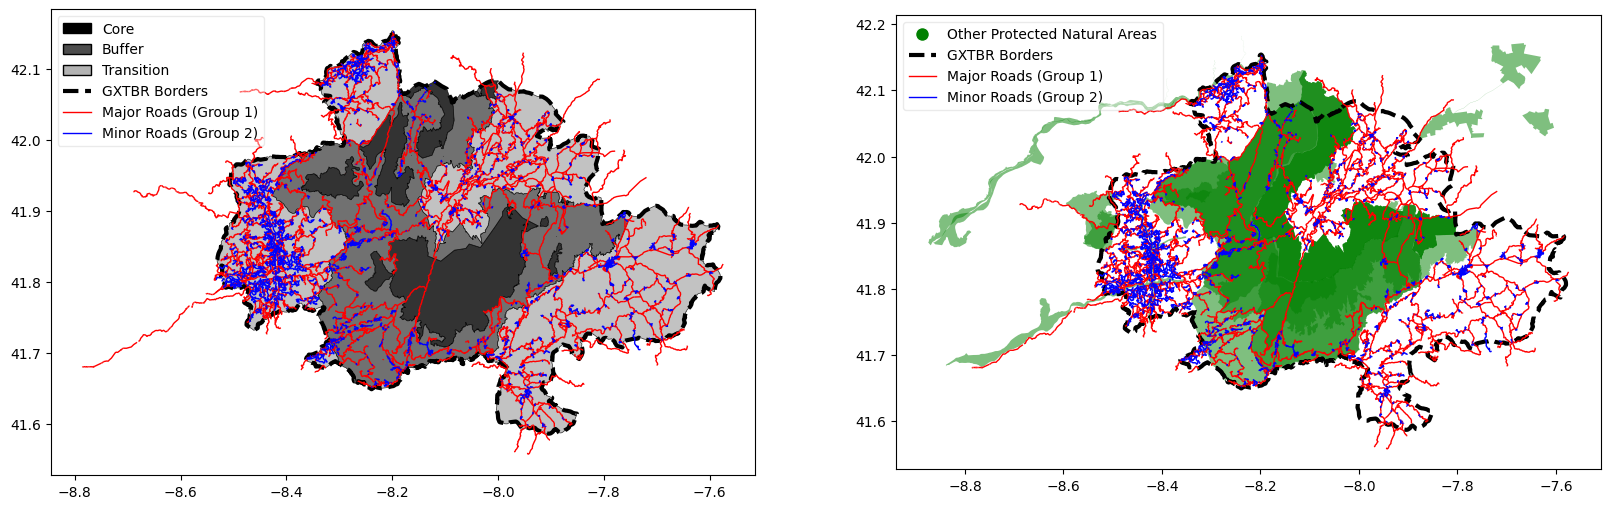

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from owslib.wfs import WebFeatureService

# Initialize WFS service
wfs_url = 'https://si.icnf.pt/wfs/zonamento_biosfera?service=wfs&version=2.0.0&request=GetCapabilities'
wfs = WebFeatureService(wfs_url)

# Fetch and filter the data for the specified feature type
response = wfs.getfeature(typename=['BDG:zonamento_biosfera'], outputFormat='application/json')
gdf = gpd.read_file(response)
gdf_filtered = gdf[gdf['nome'] == 'Geres']

# Reproject to EPSG:4326
gdf_filtered = gdf_filtered.to_crs(epsg=4326)

# Read the existing layers
road_network = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/Portugal Road Network/gx_osm/osmroads.shp')
anps_layer = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/gx/anps (osm)/anps_osm.gpkg')
new_layer = gpd.read_file('~/Library/CloudStorage/OneDrive-Conicet/portugal database/gx/gx/gx.shp')

# Reproject existing layers to EPSG:4326
anps_layer = anps_layer.to_crs(epsg=4326)
new_layer = new_layer.to_crs(epsg=4326)

# Define road categories and styles
group_1 = ['trunk', 'trunk_link', 'unclassified', 'tertiary', 'tertiary_link', 'secondary', 'primary', 'primary_link','secondary_link']
group_2 = ['residential','living_street', 'pedestrian', 'path', 'steps', 'cycleway']

category_styles = {
    'group_1': {'color': 'red', 'linewidth': 1.0},
    'group_2': {'color': 'blue', 'linewidth': 1.0}
}

# Create a new figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the WFS layer with shades of gray for each 'zone', GX boundaries, and road groups on the first subplot (Map 1)
for zone, color in zip(['Core', 'Buffer', 'Transition'], [(0, 0, 0), (0.3, 0.3, 0.3), (0.7, 0.7, 0.7)]):
    gdf_filtered[gdf_filtered['zone'] == zone].plot(ax=axs[0], color=color, linewidth=0.5, edgecolor='black', alpha=0.8)

# Continue with the rest of the elements (GX boundaries and road groups)
new_layer.boundary.plot(ax=axs[0], color='black', linewidth=3.0, linestyle='--')  # Dashed line for GXTBR borders
for group, style in category_styles.items():
    roads_in_group = road_network[road_network['highway'].isin(group_1) if group == 'group_1' else road_network['highway'].isin(group_2)]
    roads_in_group.plot(ax=axs[0], color=style['color'], linewidth=style['linewidth'])

# Create custom legend entries for Map 1
legend_elements_1 = [
    Patch(facecolor=(0, 0, 0), edgecolor='black', label='Core'),
    Patch(facecolor=(0.3, 0.3, 0.3), edgecolor='black', label='Buffer'),
    Patch(facecolor=(0.7, 0.7, 0.7), edgecolor='black', label='Transition'),
    Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='GXTBR Borders'),  # Dashed line for GXTBR borders
    Line2D([0], [0], color='red', linewidth=1, label='Major Roads (Group 1)'),
    Line2D([0], [0], color='blue', linewidth=1, label='Minor Roads (Group 2)')
]

# Add legend to Map 1 with full transparency
axs[0].legend(handles=legend_elements_1, loc='upper left', fontsize=10, framealpha=0.4)

# Plot the ANP layer, GX boundaries, and road groups on the second subplot (Map 2)
anps_layer.plot(ax=axs[1], color='green', alpha=0.5)
new_layer.boundary.plot(ax=axs[1], color='black', linewidth=3.0, linestyle='--')  # Dashed line for GXTBR borders
for group, style in category_styles.items():
    roads_in_group = road_network[road_network['highway'].isin(group_1) if group == 'group_1' else road_network['highway'].isin(group_2)]
    roads_in_group.plot(ax=axs[1], color=style['color'], linewidth=style['linewidth'])

# Create custom legend entries for Map 2
legend_elements_2 = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Other Protected Natural Areas'),
    Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='GXTBR Borders'),  # Dashed line for GXTBR borders
    Line2D([0], [0], color='red', linewidth=1, label='Major Roads (Group 1)'),
    Line2D([0], [0], color='blue', linewidth=1, label='Minor Roads (Group 2)')
]

# Add legend to Map 2 with full transparency
axs[1].legend(handles=legend_elements_2, loc='upper left', fontsize=10, framealpha=0.4)

# Show the map
plt.show()


<div style="text-align: justify"> 
</div>


This code reads road data from a GeoJSON file containing OSM (2024) and TomTom (2024) variables. It retains the segment length extension variable from OSM (2024) and the sample size collected for each segment from TomTom (2024), which serves as an indirect index of traffic density. Then, it calculates the length of each road segment and plots the distribution of sample sizes and total length by highway type, in a boxplot and in a barchart (double axis).

Unique values in 'highway' column: ['secondary' 'secondary_link' 'primary' 'primary_link' 'unclassified'
 'tertiary' 'residential' 'pedestrian' 'service' 'living_street' 'unknown'
 'trunk' 'path' 'cycleway' 'tertiary_link' 'trunk_link']


/var/folders/yz/77hc_3j92q32r2p9qtkjtwwr0000gn/T/ipykernel_1407/1302358573.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(total_lengths['highway'], rotation=90)


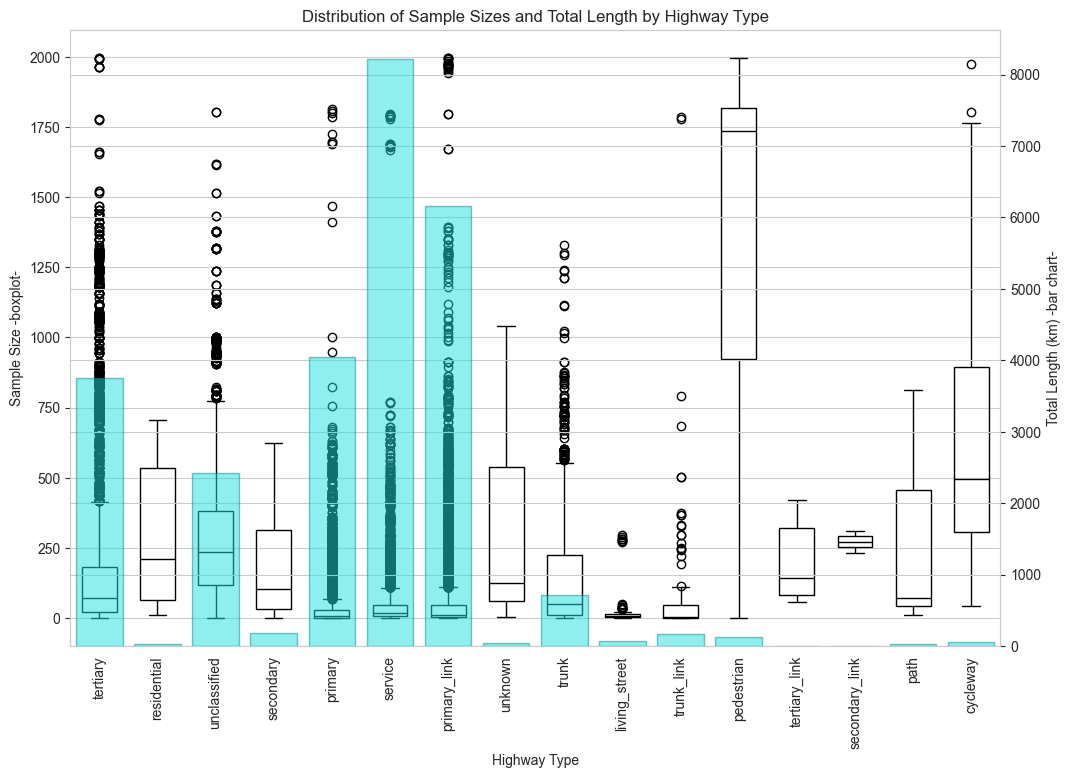

In [25]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype 

# Define the path to the GeoJSON file
file_path = '~/Library/CloudStorage/OneDrive-Conicet/jupyter/roads/joined_output.geojson'

# Expand the user home directory symbol (~)
file_path = os.path.expanduser(file_path)

# Check if the file exists
if os.path.exists(file_path):
    # Read the GeoJSON file into a GeoDataFrame
    joined_gdf = gpd.read_file(file_path)

    # Reproject the data to EPSG:3395
    joined_gdf = joined_gdf.to_crs(epsg=3395)

    # Calculate the length of each geometry in kilometers
    joined_gdf['length_km'] = joined_gdf['geometry'].length / 1000  # Convert meters to kilometers

    # Convert GeoDataFrame to DataFrame
    joined_df = pd.DataFrame(joined_gdf)

    # Replace nan values in 'highway' column with 'Unknown'
    joined_df['highway'] = joined_df['highway'].fillna('unknown')

    # Calculate total length for each highway type
    total_lengths = joined_df.groupby('highway')['length_km'].sum().reset_index()

    # Sort total_lengths DataFrame by 'length_km' in ascending order for bar plot
    total_lengths = total_lengths.sort_values('length_km', ascending=False)

    # Check the unique values in the "highway" column for reference
    unique_highways = joined_df['highway'].unique()
    print(f"Unique values in 'highway' column: {unique_highways}")

    # Create the main plot using Seaborn for better styling options
    fig, ax1 = plt.subplots(figsize=(12, 8))
    sns.boxplot(x='highway', y='sampleSize', data=joined_df, ax=ax1, color='none', boxprops=dict(edgecolor='black', facecolor='none'), medianprops=dict(color='black'), width=0.6)

    # Create the secondary axis
    ax2 = ax1.twinx()

    # Add total length data to the plot
    sns.barplot(x='highway', y='length_km', data=total_lengths, ax=ax2, color='cyan', alpha=0.5, edgecolor='darkcyan', order=total_lengths['highway'])

    
    # Fix for deprecation warning
    if isinstance(joined_df['highway'].dtype, CategoricalDtype):
        print("The column 'highway' is of categorical type.")

    # Add plot title and axis labels
    ax1.set_title("Distribution of Sample Sizes and Total Length by Highway Type")
    ax1.set_xlabel("Highway Type")
    ax1.set_ylabel("Sample Size -boxplot-")
    ax2.set_ylabel("Total Length (km) -bar chart-")

    # Rotate x-axis labels for better visibility
    ax1.set_xticklabels(total_lengths['highway'], rotation=90)

    # Show the plot
    plt.show()

else:
    print(f"The file {file_path} does not exist. Please check the file path and try again.")


In [5]:
import geopandas as gpd

# Path to the GeoJSON file
file_path = '~/Library/CloudStorage/OneDrive-Conicet/jupyter/roads/joined_output.geojson'

# Read the GeoJSON file
gdf = gpd.read_file(file_path)

# Display the variables (columns) in the GeoDataFrame
print("Variables (columns) in the GeoDataFrame:")
print(gdf.columns)

# Display the first rows of the GeoDataFrame
print("\nFirst rows of the GeoDataFrame:")
print(gdf.head())



Variables (columnas) en el GeoDataFrame:
Index(['fid', 'segmentId', 'newSegmentId', 'speedLimit', 'frc', 'streetName',
       'distance', 'avspeed', 'harmonicAverageSpeed', 'sampleSize',
       ...
       'name', 'destinat_1', 'layer', 'bridge', 'maxspeed', 'lanes', 'surface',
       'oneway', 'ref', 'geometry'],
      dtype='object', length=130)

Primeras filas del GeoDataFrame:
   fid       segmentId                           newSegmentId  speedLimit  \
0    1 -17240006024430  -00004530-3800-0400-0000-000001158f18          90   
1    1 -17240006024430  -00004530-3800-0400-0000-000001158f18          90   
2    1 -17240006024430  -00004530-3800-0400-0000-000001158f18          90   
3    1 -17240006024430  -00004530-3800-0400-0000-000001158f18          90   
4    1 -17240006024430  -00004530-3800-0400-0000-000001158f18          90   

   frc              streetName  distance  avspeed  harmonicAverageSpeed  \
0    4  Calle de Lamas Calvelo     30.54    34.26                  33.0   
1   